# Analyzing Fitness Metrics Data AND Predict Calories_Burned

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading data
df = pd.read_csv('Fitness_Metrics.csv')
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### Data Structure

In [3]:
#Check data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [6]:
df.shape

(973, 15)

In [7]:
df.duplicated().sum()

0

In [8]:
df0=df.copy()

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

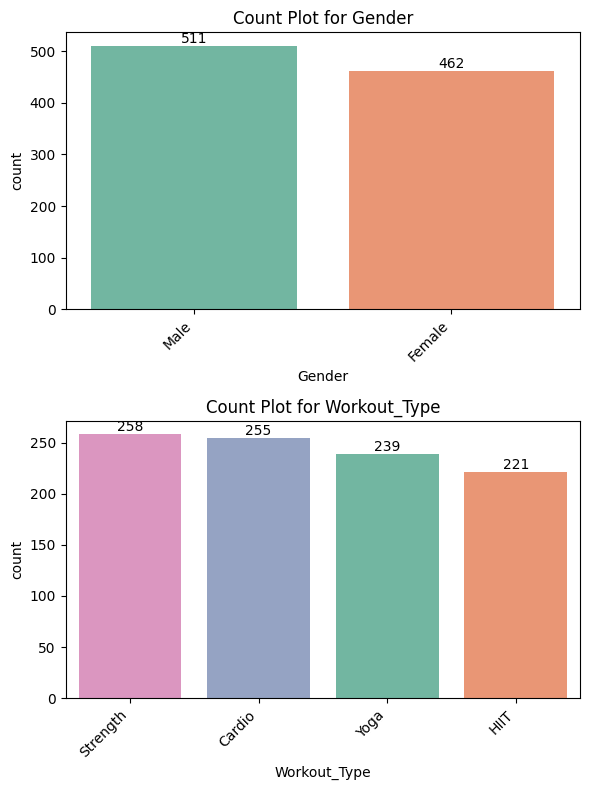

In [9]:
categorical_columns=df.select_dtypes(include=['object']).columns
plt.figure(figsize=(6,8))

# Loop through categorical columns and plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,
                      palette=sns.color_palette("Set2", len(df[col].unique())),hue=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45, ha='right')
    
    # Add counts on top of bars
    for p in ax.containers:
        ax.bar_label(p)

plt.tight_layout()
plt.show()

In [10]:
Numerical_columns=df.select_dtypes(include=['float64','int64']).columns
df[Numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


### Visual Exploration

#### Age

##### Histogram: Help to find out range of age

##### Boxplot by Experience Level: If Age correlate with exprience level

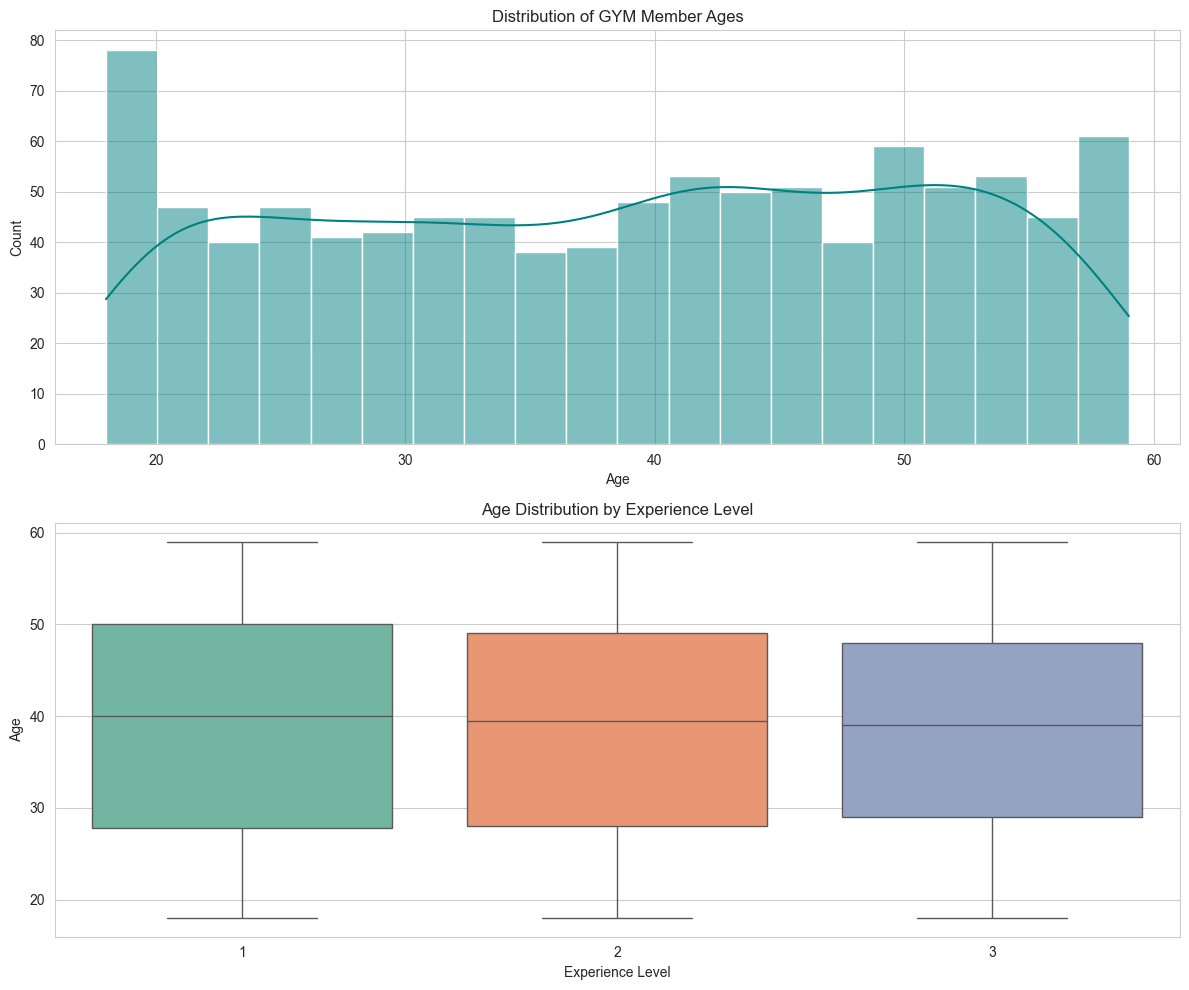

In [11]:
# Makeup
sns.set_style('whitegrid')

# twins for suplot

fig, (ax1,ax2)= plt.subplots(2,1, figsize =(12,10))

# Histogram of AGE
sns.histplot(data=df, x= 'Age', kde= True , bins=20, color='teal', ax=ax1)
ax1.set_title('Distribution of GYM Member Ages')

ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

# Boxplot of age by Exprience level
sns.boxplot(data=df, x='Experience_Level', y='Age', ax=ax2,hue='Experience_Level',palette='Set2',legend=False)
ax2.set_title('Age Distribution by Experience Level')
ax2.set_xlabel('Experience Level')
ax2.set_ylabel('Age')
plt.tight_layout()
plt.show()

#### Gender

##### Bar Plot: To see man or woman who make more effort to be in fit

##### Grouped Analysis: Gender Compare with other variable of caloried burned, Max_PBM, Workout_Type

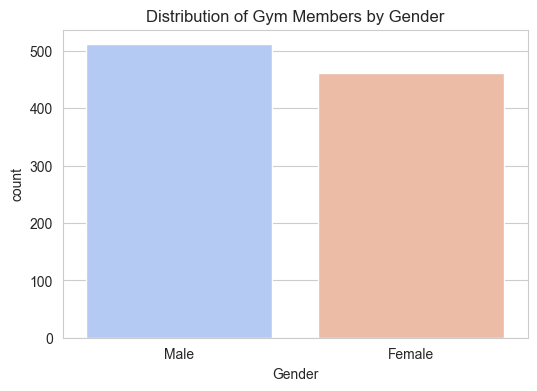

In [12]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Barplot Gender
sns.countplot(data=df, x='Gender',hue='Gender', palette='coolwarm', ax=ax1,legend=False)
ax1.set_title('Distribution of Gym Members by Gender')

ax1.set_xlabel('Gender')
ax1.set_ylabel('count')
plt.show()

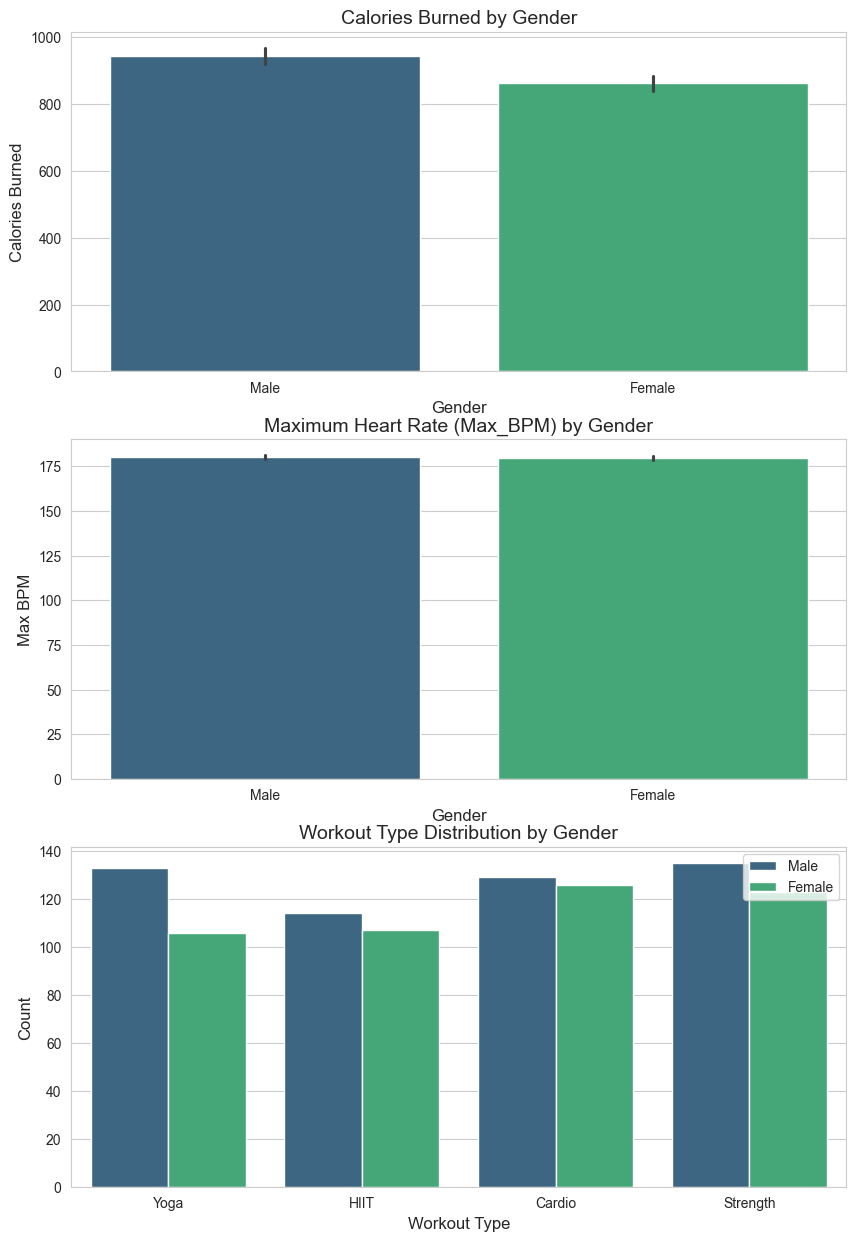

In [13]:
fig,(ax1,ax2,ax3)= plt.subplots(3,1,figsize=(10,15))

# BarPlot Gender vs calories burned

sns.barplot(data=df, x='Gender', y='Calories_Burned',hue='Gender', palette='viridis', ax=ax1)
ax1.set_title('Calories Burned by Gender', fontsize=14)
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Calories Burned', fontsize=12)

# Barplot Gender vs max BPM
sns.barplot(data=df, x='Gender', y='Max_BPM',hue='Gender', palette='viridis', ax=ax2)
ax2.set_title('Maximum Heart Rate (Max_BPM) by Gender', fontsize=14)
ax2.set_xlabel('Gender', fontsize=12)
ax2.set_ylabel('Max BPM', fontsize=12)

# 3. Countplot: Gender vs. Workout Type
sns.countplot(data=df, x='Workout_Type', hue='Gender', palette='viridis', ax=ax3)
ax3.legend(loc='upper right')
ax3.set_title('Workout Type Distribution by Gender', fontsize=14)
ax3.set_xlabel('Workout Type', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)


plt.show()

#### Weight, Height

##### Scatter Plot to check relationship of Height weight by Gender.

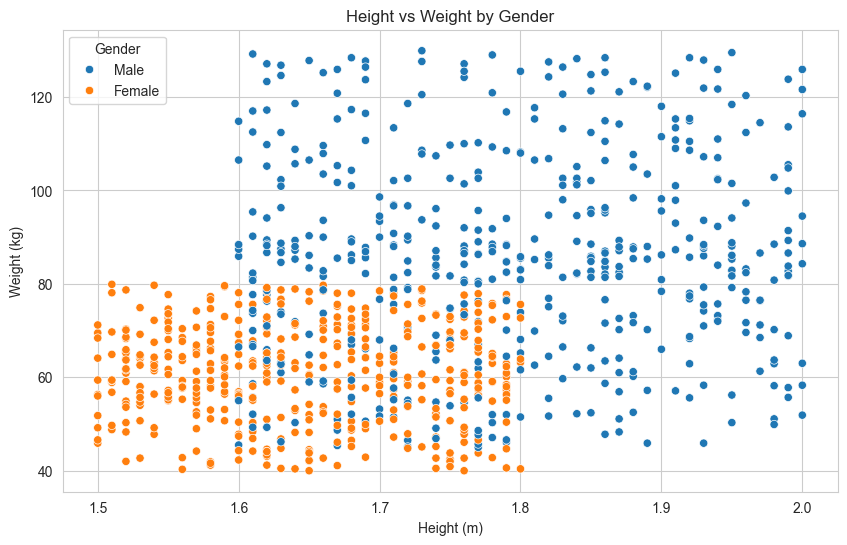

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height (m)', y='Weight (kg)', hue='Gender')
plt.title('Height vs Weight by Gender')
plt.show()

##### Box plot compare Weight by Age group

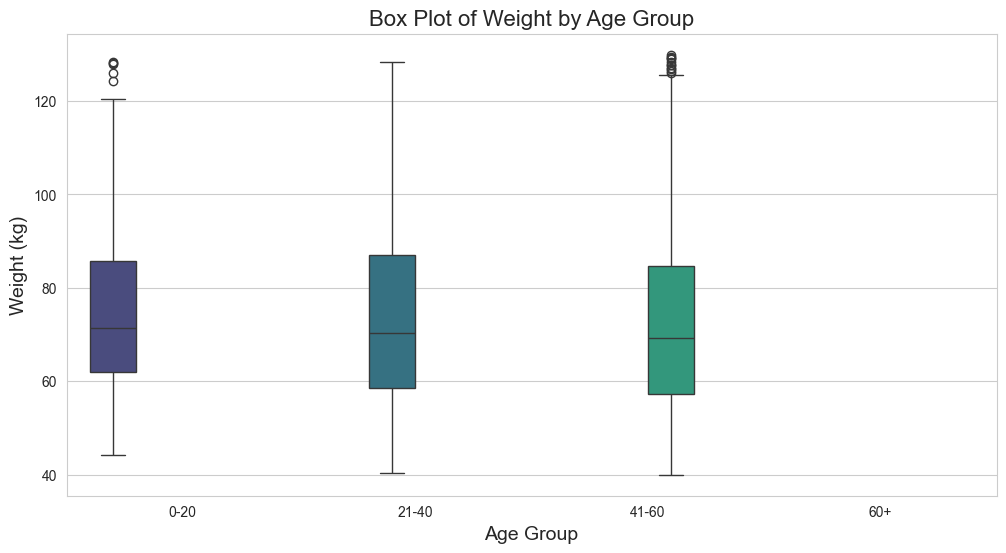

In [15]:
# For age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '60+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Weight (kg)',hue='Age_Group', palette='viridis')
plt.title('Box Plot of Weight by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.show()

##### The 0-20 age group has several outliers, indicating a few individuals with much higher weights compared to the rest of the group

##### Box plot compare Height by Age group

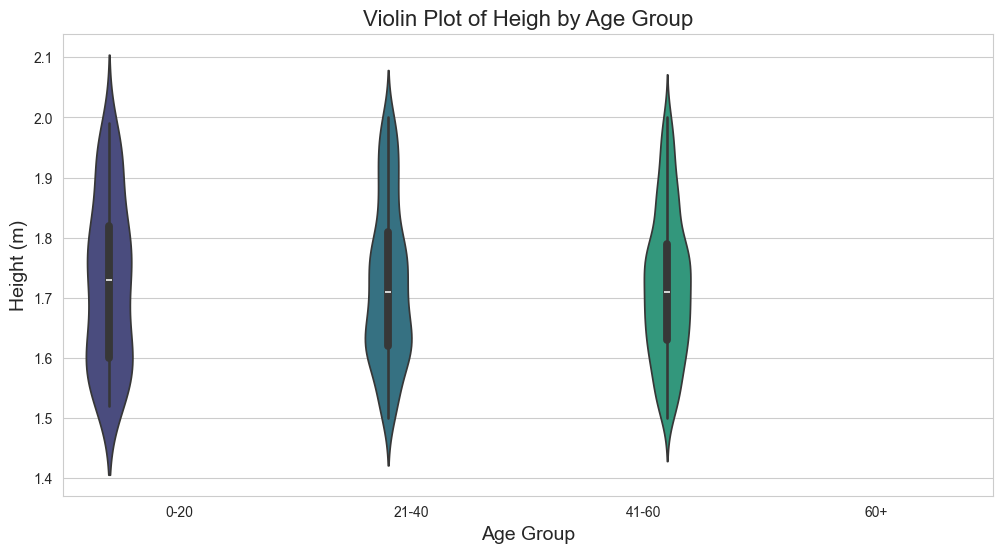

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Age_Group', y='Height (m)',hue='Age_Group', palette='viridis')
plt.title('Violin Plot of Heigh by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Height (m)', fontsize=14)
plt.show()

##### The width of the violins at any given height indicates the number of individuals at that height within the age group.

##### All age groups seem to have a relatively similar range of heights, with the majority of individuals falling between approximately 1.6 and 2.0 meters








#### Beat Per minute (Max,AVG,Resting)

##### BOX Plot compare workouttype and Gender

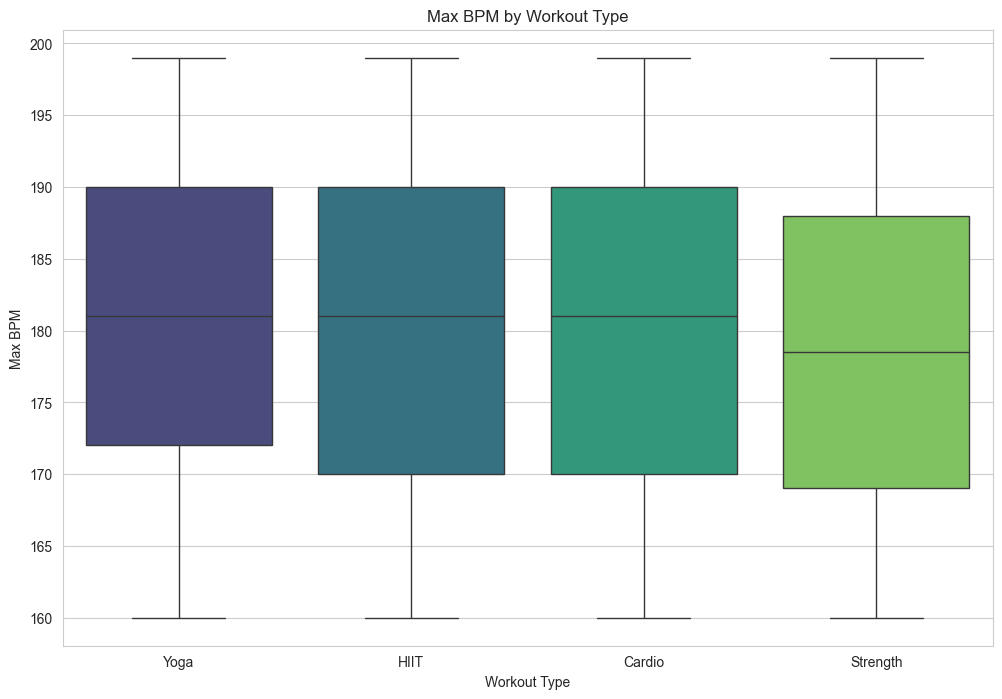

In [17]:
plt.figure(figsize =(12,8))

sns.boxplot(data=df, x='Workout_Type', y='Max_BPM',hue='Workout_Type', palette='viridis')
plt.title('Max BPM by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Max BPM')
plt.show()

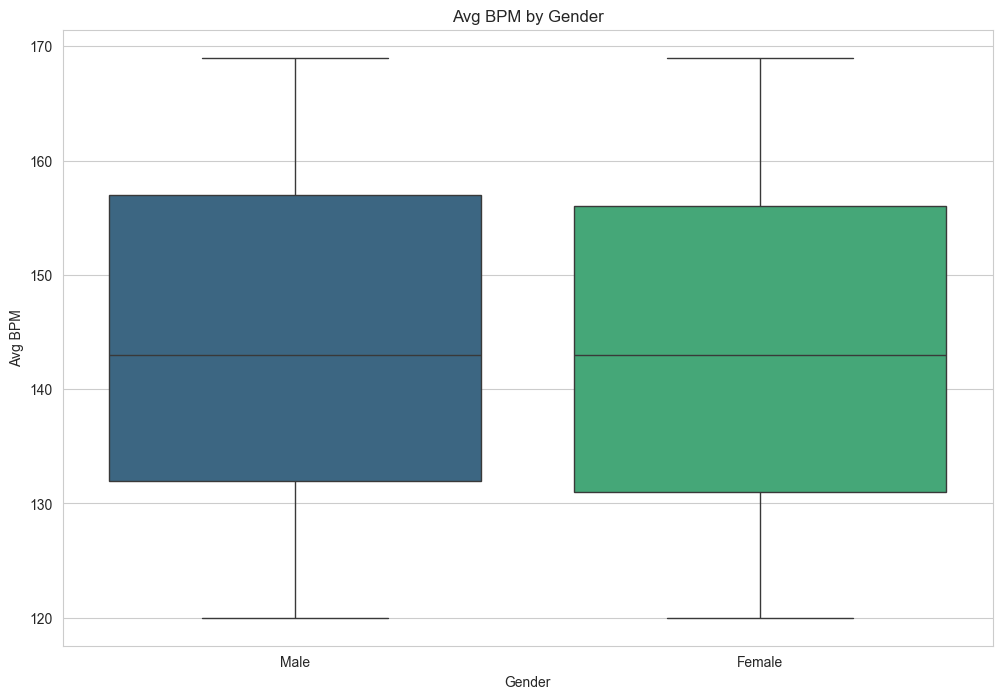

In [18]:
# Boxplot for Avg_BPM by Gender
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Gender', y='Avg_BPM',hue='Gender', palette='viridis')
plt.title('Avg BPM by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg BPM')
plt.show()

##### Pairplot to shows pairwise relationships between all BPM features.

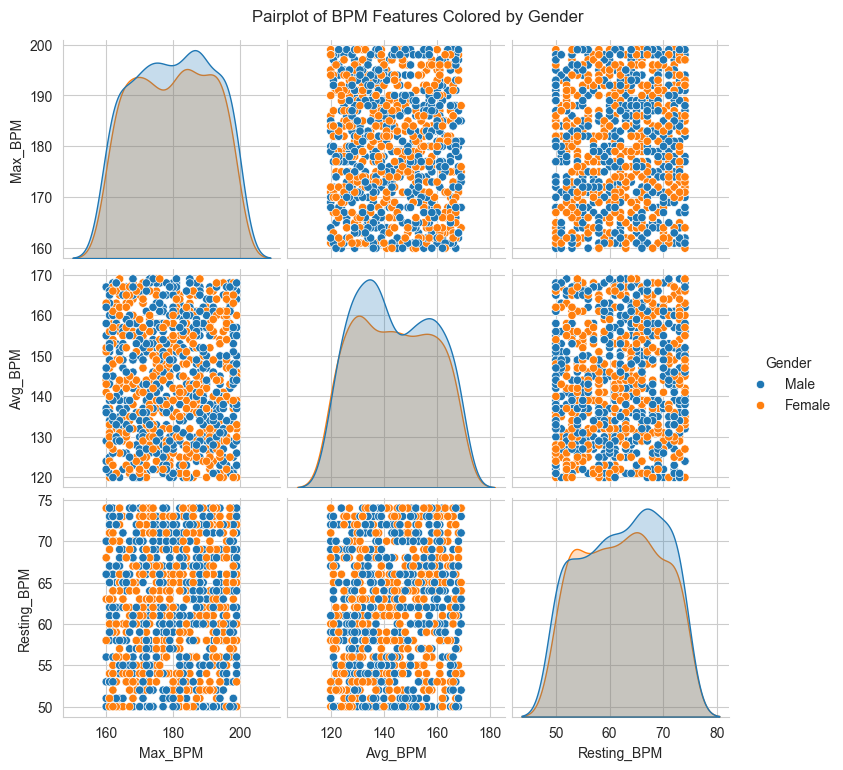

In [19]:
sns.pairplot(df[['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Gender']], hue='Gender')
plt.suptitle('Pairplot of BPM Features Colored by Gender', y=1.02)
plt.show()

##### There is no strong separation between males and females in terms of heart rate features; both genders seem to have similar distributions.

##### Resting_BPM is not in weak relationshop but Max_BPM vs Avg_BPM: The scatter plot shows a positive relationship where higher Max_BPM values are generally associated with higher Avg_BPM values for both males and females.

#### Session_Duration (hours) and Calories_Burned

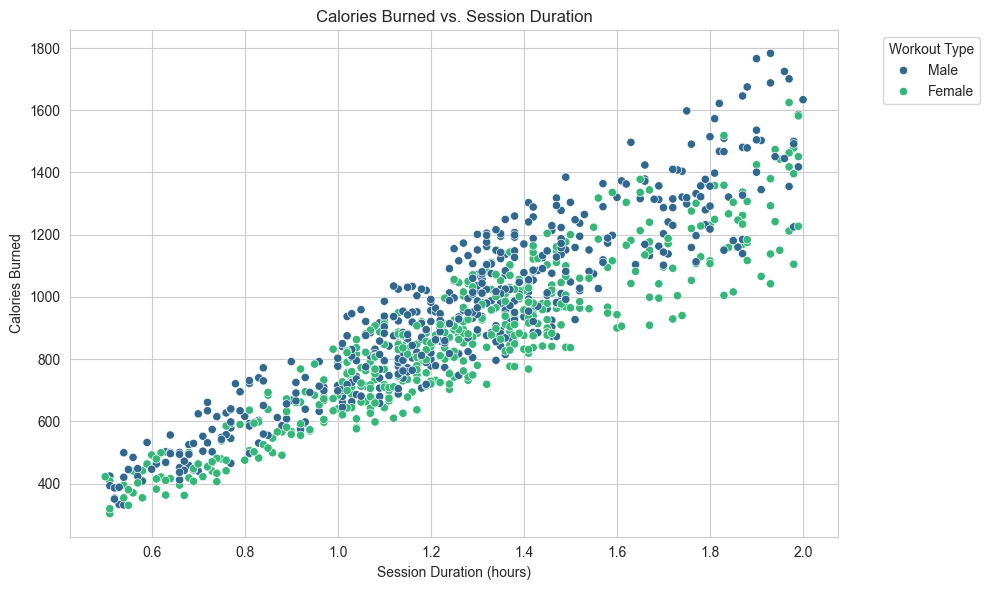

In [20]:
# Scatter Plot: Calories_Burned vs. Session_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Gender', palette='viridis')
plt.title('Calories Burned vs. Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Workout Type

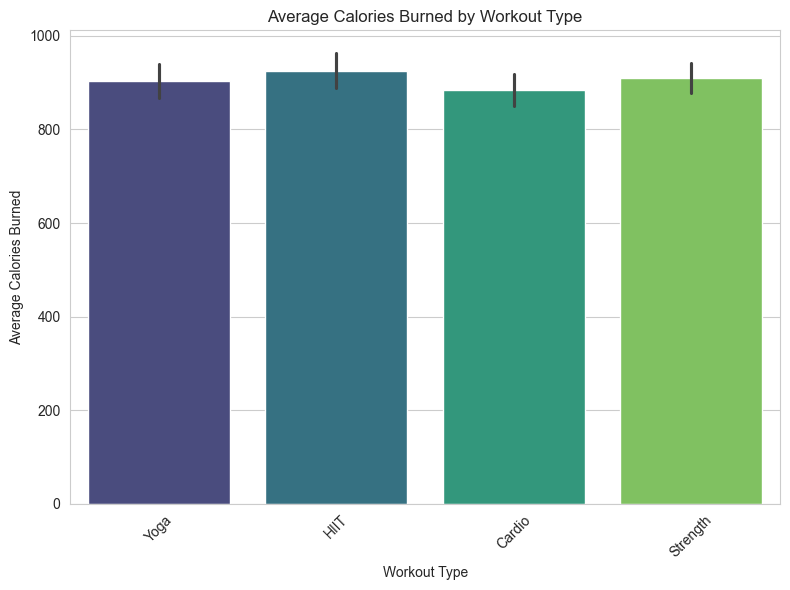

In [21]:
# Barplot: Average Calories_Burned by Workout_Type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Workout_Type', y='Calories_Burned',hue='Workout_Type', estimator=np.mean, palette='viridis')
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Fat_Percentage

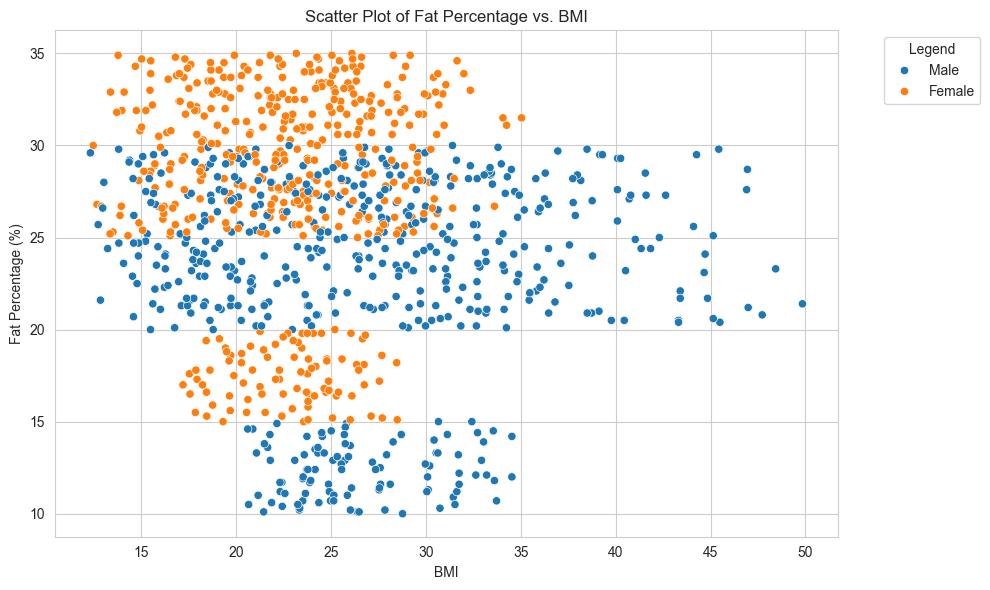

In [22]:
# Scatter Plot: Fat_Percentage vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Fat_Percentage', hue='Gender')
plt.title('Scatter Plot of Fat Percentage vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage (%)')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Water_Intake

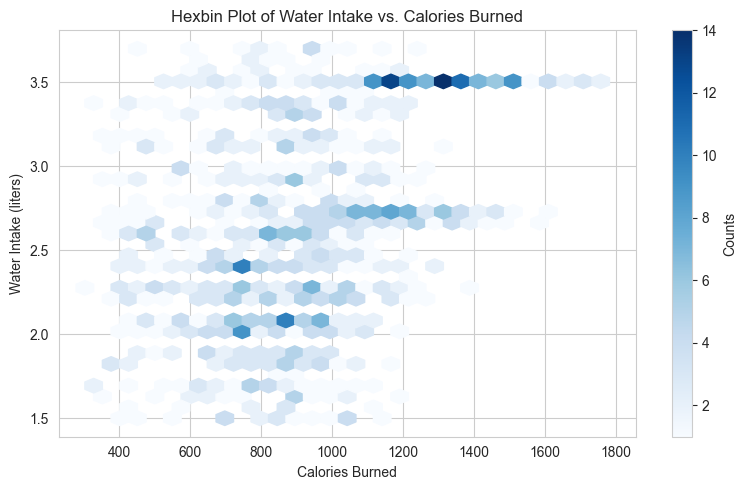

In [23]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['Calories_Burned'], df['Water_Intake (liters)'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Water Intake vs. Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Water Intake (liters)')
plt.tight_layout()
plt.show()

#### Workout_Frequency (days/week)

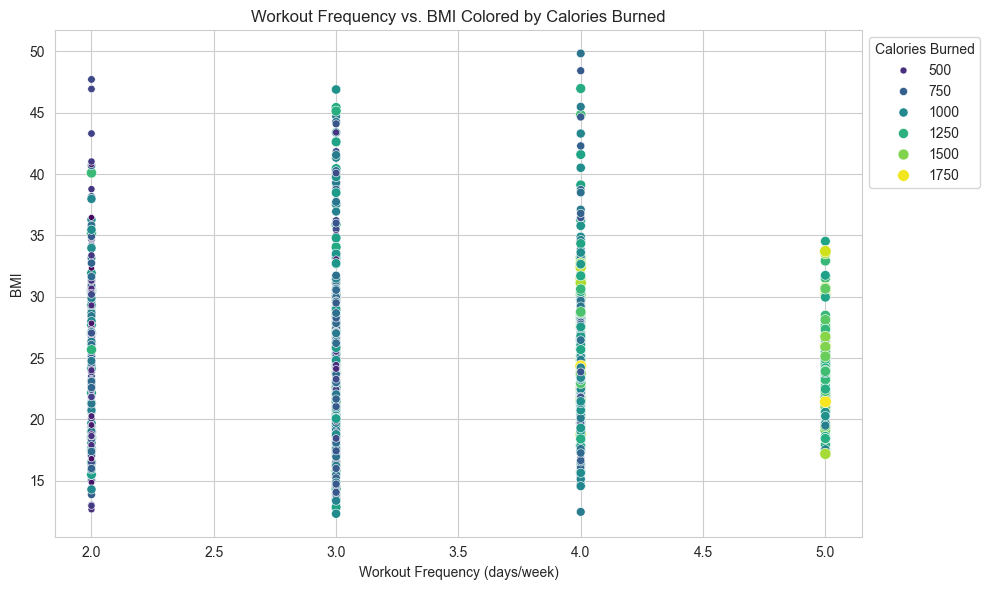

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Workout_Frequency (days/week)', y='BMI', size='Calories_Burned', hue='Calories_Burned',  palette='viridis')
plt.title('Workout Frequency vs. BMI Colored by Calories Burned')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('BMI')
plt.legend(title='Calories Burned', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Expriemce Level

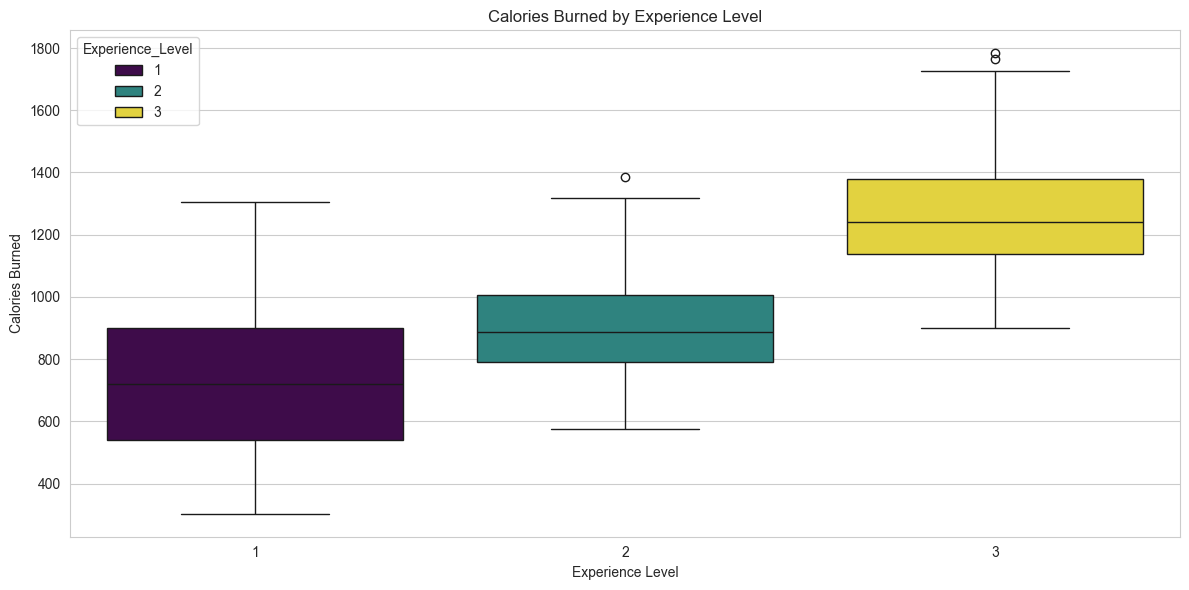

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned',hue='Experience_Level', palette='viridis')
plt.title('Calories Burned by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_7248\968096819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Workout_Frequency (days/week)', palette='viridis')


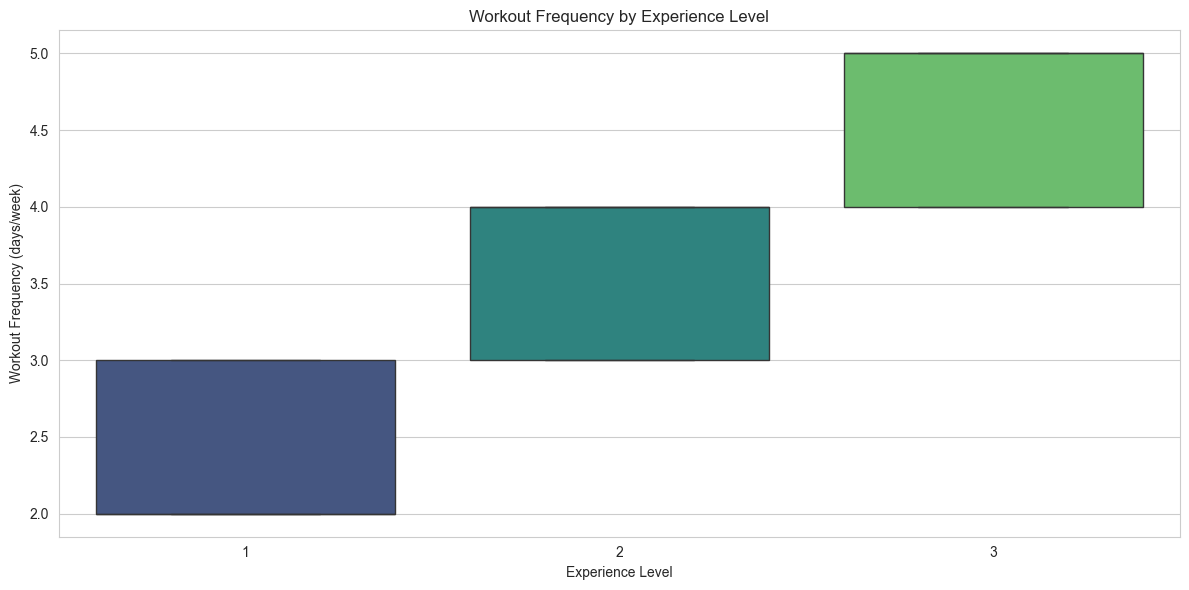

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Workout_Frequency (days/week)', palette='viridis')
plt.title('Workout Frequency by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (days/week)')
plt.tight_layout()
plt.show()

#### BMI (Continuous Variable)

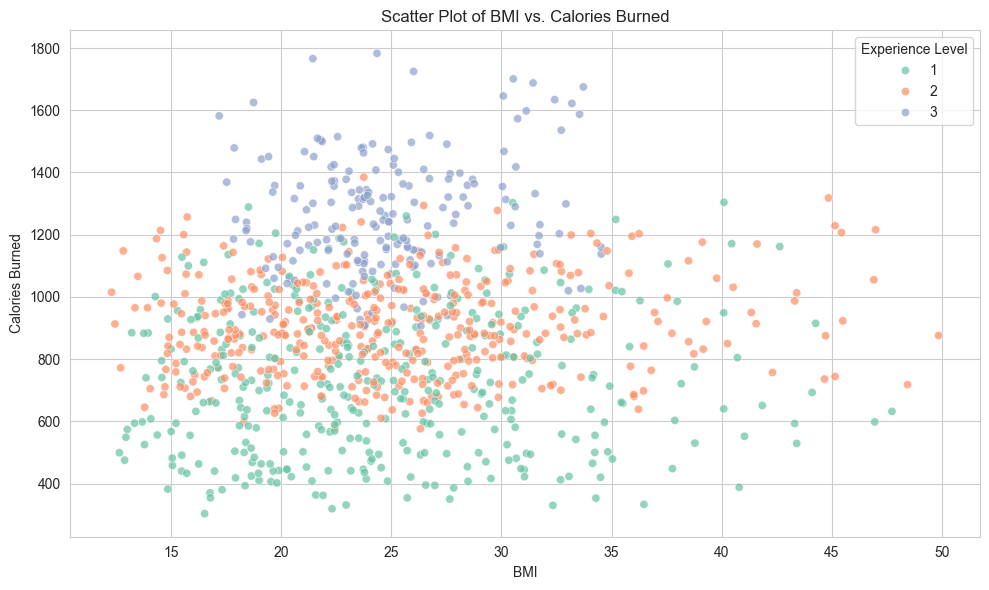

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Experience_Level', palette='Set2', alpha=0.7)
plt.title('Scatter Plot of BMI vs. Calories Burned')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

#### Correlation Numeric Data

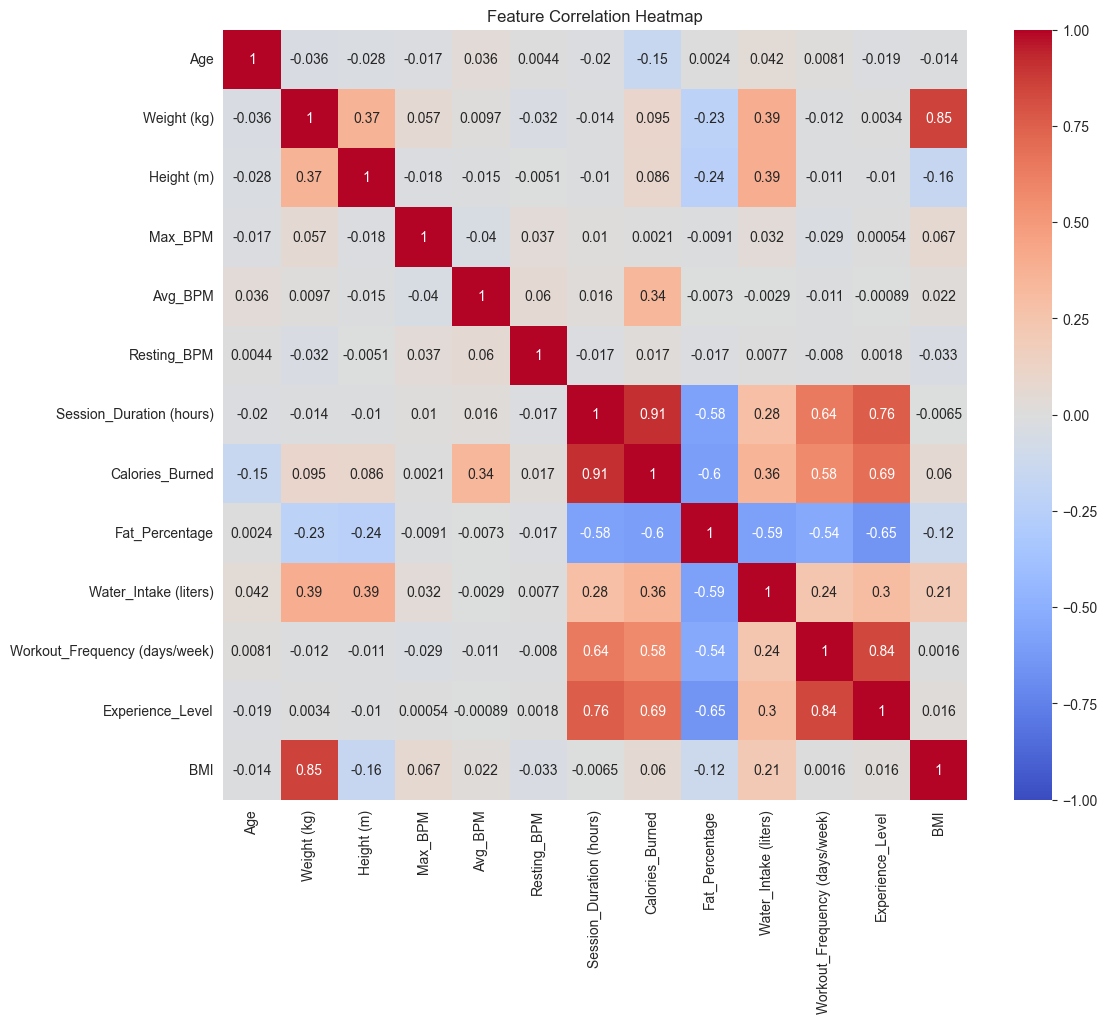

In [28]:
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

### Predict Calories_Burned

#### One-hot encode categorical variables

In [29]:
# One-hot encode categorical variables 
df = pd.get_dummies(df, columns=['Workout_Type', 'Gender'], drop_first=True)

#### Create separate datasets for men and women.

In [30]:
# Split Data by Gender
df_men = df[df['Gender_Male'] == 1]
df_women = df[df['Gender_Male'] == 0]

#### Feature selection

In [31]:
#Feature Selection
features = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
    'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 
    'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 
    'BMI']

#### Define X Y

In [32]:
# Predicting for Men
X_men = df_men[features]
y_men = df_men['Calories_Burned']

# Predicting for Women
X_women = df_women[features]
y_women = df_women['Calories_Burned']

### FOR MEN

In [33]:
# Train-Test Split for Men
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, 
y_men, test_size=0.2, random_state=42)

In [34]:
# Train the Random Forest Regressor for Men
model_men = RandomForestRegressor(n_estimators=100, random_state=42)
model_men.fit(X_train_men, y_train_men)

RandomForestRegressor(random_state=42)

In [35]:
# Make predictions for Men
y_pred_men = model_men.predict(X_test_men)

# Step 5: Evaluate the model for Men
mse_men = mean_squared_error(y_test_men, y_pred_men)
r2_men = r2_score(y_test_men, y_pred_men)

print("Men's Model Performance:")
print(f'Mean Squared Error: {mse_men}')
print(f'R^2 Score: {r2_men}')

Men's Model Performance:
Mean Squared Error: 2952.961844660193
R^2 Score: 0.9704322789085285


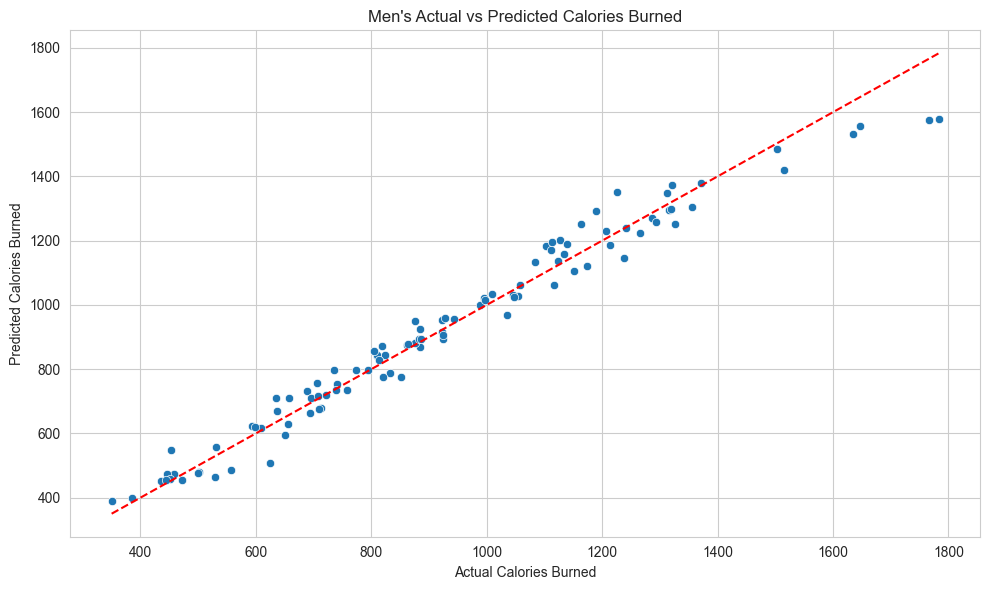

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_men, y=y_pred_men)
plt.plot([y_test_men.min(), y_test_men.max()], [y_test_men.min(), y_test_men.max()], color='red', linestyle='--')
plt.title("Men's Actual vs Predicted Calories Burned")
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.tight_layout()
plt.show()

### For Women

In [37]:
# Train-Test Split for Women
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, 
y_women, test_size=0.2, random_state=42)

In [38]:
# Train the Random Forest Regressor for Women
model_women = RandomForestRegressor(n_estimators=100, random_state=42)
model_women.fit(X_train_women, y_train_women)

RandomForestRegressor(random_state=42)

In [39]:
# Make predictions for Women
y_pred_women = model_women.predict(X_test_women)

# Evaluate the model for Women
mse_women = mean_squared_error(y_test_women, y_pred_women)
r2_women = r2_score(y_test_women, y_pred_women)

print("\nWomen's Model Performance:")
print(f'Mean Squared Error: {mse_women}')
print(f'R^2 Score: {r2_women}')


Women's Model Performance:
Mean Squared Error: 1188.3387118279575
R^2 Score: 0.9827441044680881


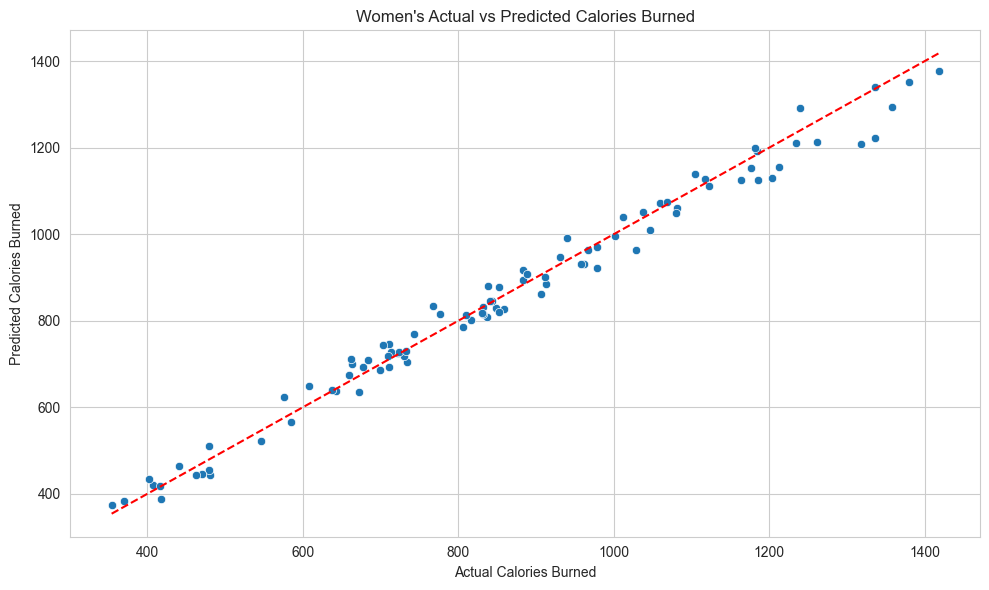

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_women, y=y_pred_women)
plt.plot([y_test_women.min(), y_test_women.max()], [y_test_women.min(), y_test_women.max()], color='red', linestyle='--')
plt.title("Women's Actual vs Predicted Calories Burned")
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.tight_layout()
plt.show()

In [41]:
def predict_calories(model_men, model_women, gender):
    # Input values (easily editable at the top)
    age = 25  # Example: Change this value
    weight = 70  # Example: Change this value
    height = 1.75  # Example: Change this value
    max_bpm = 180  # Example: Change this value
    avg_bpm = 120  # Example: Change this value
    resting_bpm = 70  # Example: Change this value
    session_duration = 1  # Example: Change this value
    fat_percentage = 15  # Example: Change this value
    water_intake = 2  # Example: Change this value
    workout_frequency = 4  # Example: Change this value
    experience_level = 2  # Example: Change this value
    bmi = 22.9  # Example: Change this value

    # Gender-based model selection
    if gender.lower() == 'male':
        model = model_men
    elif gender.lower() == 'female':
        model = model_women
    else:
        print("Invalid gender input. Please enter 'Male' or 'Female'.")
        return

    # Prepare input array with the values from above
    user_input = np.array([[age, weight, height, max_bpm, avg_bpm, resting_bpm,
                            session_duration, fat_percentage, water_intake, workout_frequency,
                            experience_level, bmi]])

    # Predict calories burned
    predicted_calories = model.predict(user_input)[0]
    print(f"Predicted Calories Burned: {predicted_calories:.2f} kcal")

# Example call for testing
gender = 'male'  # You can change this to 'Female' as needed
inputs = [25, 70, 1.75, 180, 120, 70, 1, 15, 2, 4, 2, 22.9]  # Replace with your own values
predict_calories(model_men, model_women, gender)


Predicted Calories Burned: 683.44 kcal


C:\Users\MOULEE\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
